In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [19]:
amd = pd.read_csv('Data/AMD (1980-2023).csv')
asus = pd.read_csv('Data/ASUS (2000-2023).csv')
intel = pd.read_csv('Data/Intel (1980-2023).csv')
msi = pd.read_csv('Data/MSI (1962-2023).csv')
nvidia = pd.read_csv('Data/NVIDIA (1999-2023).csv')

In [20]:
asus.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [21]:
for i in asus.columns[1:]:
    asus[i].fillna(method='ffill',inplace=True)

In [22]:
amd.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,10859,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,1.085900e+04
unique,10859,NaN,NaN,NaN,NaN,NaN,NaN
top,1980-03-18,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.350958,17.010710,16.280518,16.648080,16.648080,1.819320e+07
std,NaN,22.396174,22.668726,21.705814,22.196357,22.196357,2.794779e+07
min,NaN,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,NaN,4.937500,5.405000,5.120000,5.265000,5.265000,1.216500e+06
50%,NaN,9.810000,10.000000,9.562500,9.760000,9.760000,6.745600e+06
75%,NaN,16.000000,16.250000,15.687500,16.000000,16.000000,2.242935e+07


In [23]:
asus.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,5809,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000,5.809000e+03
unique,5809,NaN,NaN,NaN,NaN,NaN,NaN
top,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,289.085363,292.271108,285.648245,288.823953,132.033444,1.017423e+09
std,NaN,76.756400,77.501044,75.704376,76.345678,67.533201,2.176489e+09
min,NaN,127.106941,130.196335,127.106941,130.196335,30.318747,0.000000e+00
25%,NaN,232.500000,235.000000,230.000000,232.000000,78.203926,1.717237e+06
50%,NaN,277.000000,279.259766,275.000000,277.000000,123.296661,3.232187e+06
75%,NaN,331.007599,335.420990,327.085663,331.147552,170.237152,7.681183e+08


In [24]:
intel.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,10859,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,1.085900e+04
unique,10859,NaN,NaN,NaN,NaN,NaN,NaN
top,1980-03-18,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,19.834106,20.105102,19.565597,19.833531,14.636382,5.056303e+07
std,NaN,17.514871,17.756945,17.278878,17.514300,14.829796,3.487815e+07
min,NaN,0.218750,0.218750,0.216146,0.216146,0.123476,0.000000e+00
25%,NaN,1.328125,1.343750,1.304688,1.328125,0.758707,2.708505e+07
50%,NaN,20.277344,20.562500,20.010000,20.280001,12.665797,4.460160e+07
75%,NaN,29.980000,30.425000,29.520000,29.950001,19.808317,6.477205e+07


In [25]:
msi.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,15424,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,1.542400e+04
unique,15424,NaN,NaN,NaN,NaN,NaN,NaN
top,1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,44.977492,46.412619,45.224755,45.825400,37.652783,1.997183e+06
std,NaN,54.883169,54.841002,53.578205,54.222402,51.144917,2.347513e+06
min,NaN,0.000000,0.866821,0.808196,0.845884,0.376771,0.000000e+00
25%,NaN,3.768789,5.175804,5.025052,5.100428,2.625478,5.059500e+05
50%,NaN,23.517244,23.856436,23.230058,23.554932,16.259139,1.294556e+06
75%,NaN,67.235199,67.988953,66.486078,67.235199,52.269761,2.627212e+06


In [26]:
nvidia.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,6094,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6.094000e+03
unique,6094,NaN,NaN,NaN,NaN,NaN,NaN
top,1999-01-25,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,30.987375,31.585369,30.369141,31.003835,30.743154,6.134634e+07
std,NaN,59.862014,61.089822,58.564768,59.881405,59.882440,4.399760e+07
min,NaN,0.348958,0.355469,0.333333,0.341146,0.313034,1.968000e+06
25%,NaN,2.671094,2.750000,2.598027,2.670208,2.450174,3.440110e+07
50%,NaN,4.285000,4.377500,4.210000,4.290000,3.946429,5.151250e+07
75%,NaN,26.690000,27.198125,26.404999,26.818125,26.440031,7.462690e+07


# Data analysis

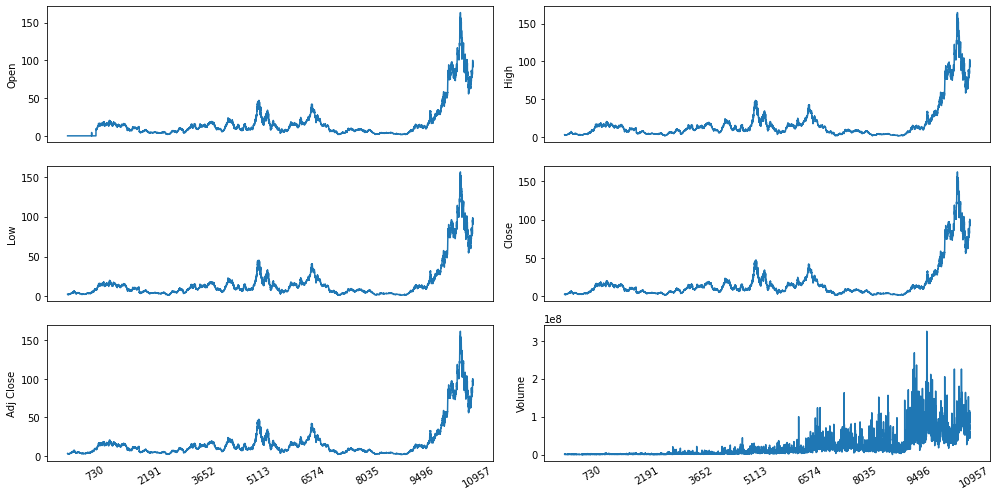

In [27]:
import matplotlib.dates as mdates
# Plot line charts
df_plot = amd.drop(columns=['Date'])

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

In [28]:
'''amd['Company']=np.repeat(0,len(amd))
asus['Company']=np.repeat(1,len(asus))
intel['Company']=np.repeat(2,len(intel))
msi['Company']=np.repeat(3,len(msi))
nvidia['Company']=np.repeat(4,len(nvidia))'''

"amd['Company']=np.repeat(0,len(amd))\nasus['Company']=np.repeat(1,len(asus))\nintel['Company']=np.repeat(2,len(intel))\nmsi['Company']=np.repeat(3,len(msi))\nnvidia['Company']=np.repeat(4,len(nvidia))"

In [29]:
merged = pd.concat([amd,asus,intel,msi,nvidia])
merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.000000,3.125000,2.937500,3.031250,3.031250,727200.0
1,1980-03-19,0.000000,3.083333,3.020833,3.041667,3.041667,295200.0
2,1980-03-20,0.000000,3.062500,3.010417,3.010417,3.010417,159600.0
3,1980-03-21,0.000000,3.020833,2.906250,2.916667,2.916667,130800.0
4,1980-03-24,0.000000,2.916667,2.635417,2.666667,2.666667,436800.0
...,...,...,...,...,...,...,...
6089,2023-04-05,268.290009,269.980011,263.950012,268.809998,268.809998,51501500.0
6090,2023-04-06,265.839996,270.799988,264.269989,270.369995,270.369995,39765400.0
6091,2023-04-10,268.230011,276.209991,266.690002,275.790009,275.790009,39527900.0
6092,2023-04-11,277.239990,277.899994,271.260010,271.690002,271.690002,31437800.0


# Merged Train and test data

In [30]:
data_list = [amd,asus,intel,msi,nvidia]

for data in data_list:
    data['Date'] = pd.to_datetime(data['Date'])

In [31]:
data_list = [amd,asus,intel,msi,nvidia]

# Below names list will be used to add a new 'Company' column to every dataset
# 0: AMD
# 1: ASUS
# 2: INTEL
# 3: MSI
# 4: NVIDIA
names = [0,1,2,3,4]
index = 0
for data in data_list:
    dates = data['Date']
    data['Company'] = np.repeat(names[index],len(data))
    data['Year'] = dates.dt.year
    data['Month'] = dates.dt.month
    data['Day'] = dates.dt.day
    index+=1

In [32]:
data_list = [amd,asus,intel,msi,nvidia]
test_data = []
train_data = []
for data in data_list:
    train = data[:int(0.8*len(data))]
    test = data[int(0.8*len(data)):]
    train_data.append(train)
    test_data.append(test)
    print(test.shape,train.shape)

(2172, 11) (8687, 11)
(1162, 11) (4647, 11)
(2172, 11) (8687, 11)
(3085, 11) (12339, 11)
(1219, 11) (4875, 11)


In [33]:
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)
print(train_data.shape)
print(test_data.shape)

(39235, 11)
(9810, 11)


In [34]:
train_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
Year         0
Month        0
Day          0
dtype: int64

In [35]:
x_train = train_data[['Open', 'High', 'Low', 'Volume', 'Year','Month', 'Day','Company']]
x_test = test_data[['Open', 'High', 'Low', 'Volume', 'Year','Month', 'Day','Company']]
y_train = train_data['Close']
y_test = test_data['Close']

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39235, 8)
(9810, 8)
(39235,)
(9810,)


# Saving Data

In [36]:
train_data.to_csv('Data/training.csv')

In [37]:
x_train.to_csv('Data/x_train.csv')
x_test.to_csv('Data/x_test.csv')
y_train.to_csv('Data/y_train.csv')
y_test.to_csv('Data/y_test.csv')

# DL

In [138]:
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training

In [141]:
df_train = train_data
# Set the input_sequence_length length - this is the timeframe used to make a single prediction
input_sequence_length = 50
# The output sequence length is the number of steps that the neural network predicts
output_sequence_length = 10 #

# Prediction Index
index_Close = 4

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_length = math.ceil(np_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_scaled[:train_data_length, :]
test_data = np_scaled[train_data_length - input_sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, input_sequence_length time steps per sample, and f features
def partition_dataset(input_sequence_length, output_sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(input_sequence_length, data_len - output_sequence_length):
        x.append(data[i-input_sequence_length:i,:]) #contains input_sequence_length values 0-input_sequence_length * columns
        y.append(data[i:i + output_sequence_length, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(input_sequence_length, output_sequence_length, train_data)
x_test, y_test = partition_dataset(input_sequence_length, output_sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
nrows = 3 # number of shifted plots
fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(16, 8))
for i, ax in enumerate(fig.axes):
    xtrain = pd.DataFrame(x_train[i][:,index_Close], columns={f'x_train_{i}'})
    ytrain = pd.DataFrame(y_train[i][:output_sequence_length-1], columns={f'y_train_{i}'})
    ytrain.index = np.arange(input_sequence_length, input_sequence_length + output_sequence_length-1)
    xtrain_ = pd.concat([xtrain, ytrain[:1].rename(columns={ytrain.columns[0]:xtrain.columns[0]})])
    df_merge = pd.concat([xtrain_, ytrain])
    sns.lineplot(data = df_merge, ax=ax)
plt.show

InvalidIndexError: (slice(0, 50, None), slice(None, None, None))

In [139]:
# Set the input_sequence_length length - this is the timeframe used to make a single prediction
input_sequence_length = 50
# The output sequence length is the number of steps that the neural network predicts
output_sequence_length = 10

# Configure the neural network model
model = Sequential()
n_output_neurons = output_sequence_length

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_input_neurons = x_train.shape[1] * x_train.shape[2]
print(n_input_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_input_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_input_neurons, return_sequences=False))
model.add(Dense(20))
model.add(Dense(n_output_neurons))

# Compile the model
model.compile(optimizer='adam', loss='mse')

IndexError: tuple index out of range

In [8]:
# Training the model
epochs = 10
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/10
540/540 [==============================] - 79s 134ms/step - loss: 6.5499e-04 - val_loss: 0.0083
Epoch 2/10
540/540 [==============================] - 72s 133ms/step - loss: 5.8657e-04 - val_loss: 0.0126
Epoch 3/10
540/540 [==============================] - 73s 136ms/step - loss: 5.7151e-04 - val_loss: 0.0144
Epoch 4/10
540/540 [==============================] - 74s 137ms/step - loss: 5.6143e-04 - val_loss: 0.0147
Epoch 5/10
540/540 [==============================] - 77s 142ms/step - loss: 5.6085e-04 - val_loss: 0.0166
Epoch 6/10
540/540 [==============================] - 76s 141ms/step - loss: 5.5632e-04 - val_loss: 0.0171
Epoch 7/10
540/540 [==============================] - 82s 151ms/step - loss: 5.5274e-04 - val_loss: 0.0210
Epoch 8/10
540/540 [==============================] - 82s 151ms/step - loss: 5.5159e-04 - val_loss: 0.0177
Epoch 9/10
540/540 [==============================] - 77s 143ms/step - loss: 5.4967e-04 - val_loss: 0.0158
Epoch 10/10
540/540 [================

# ML

Decision Treee

In [38]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [39]:
print('Test score:',dt.score(x_test,y_test))
print('Train score:',dt.score(x_train,y_train))

Test score: 0.9995536298964616
Train score: 1.0


In [40]:
y_pred = dt.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

r2_score: 0.9995536298964616
MAE: 1.0284022981651377


Linear Regression 

In [41]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
print('Test score:',lr.score(x_test,y_test))
print('Train score:',lr.score(x_train,y_train))

Test score: 0.9998405444198196
Train score: 0.999895773053461


In [43]:
y_pred = lr.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

r2_score: 0.9998405444198196
MAE: 0.681866693896915


Extra Trees Regression 

In [44]:
etr = ExtraTreeRegressor()
etr.fit(x_train,y_train)

ExtraTreeRegressor()

In [45]:
print('Test score:',etr.score(x_test,y_test))
print('Train score:',etr.score(x_train,y_train))

Test score: 0.9994142211412407
Train score: 1.0


In [46]:
y_pred = etr.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

r2_score: 0.9994142211412407
MAE: 1.1654668512742097


Random Forest Regression

In [128]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [129]:
print('Test score:',rf.score(x_test,y_test))
print('Train score:',rf.score(x_train,y_train))

Test score: 0.9998013249033134
Train score: 0.9999740655897109


In [130]:
y_pred = rf.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

r2_score: 0.9998013249033134
MAE: 0.712384695570204


Plotting best model predictions

In [47]:
amd_dates = test_data[test_data['Company']==0]['Date']
amd_pred = lr.predict(x_test[x_test['Company']==0])
amd_orig = test_data[test_data['Company']==0]['Close']

asus_dates = test_data[test_data['Company']==1]['Date']
asus_pred = lr.predict(x_test[x_test['Company']==1])
asus_orig = test_data[test_data['Company']==1]['Close']

intel_dates = test_data[test_data['Company']==2]['Date']
intel_pred = lr.predict(x_test[x_test['Company']==2])
intel_orig = test_data[test_data['Company']==2]['Close']

msi_dates = test_data[test_data['Company']==3]['Date']
msi_pred = lr.predict(x_test[x_test['Company']==3])
msi_orig = test_data[test_data['Company']==3]['Close']

nvidia_dates = test_data[test_data['Company']==4]['Date']
nvidia_pred = lr.predict(x_test[x_test['Company']==4])
nvidia_orig = test_data[test_data['Company']==4]['Close']

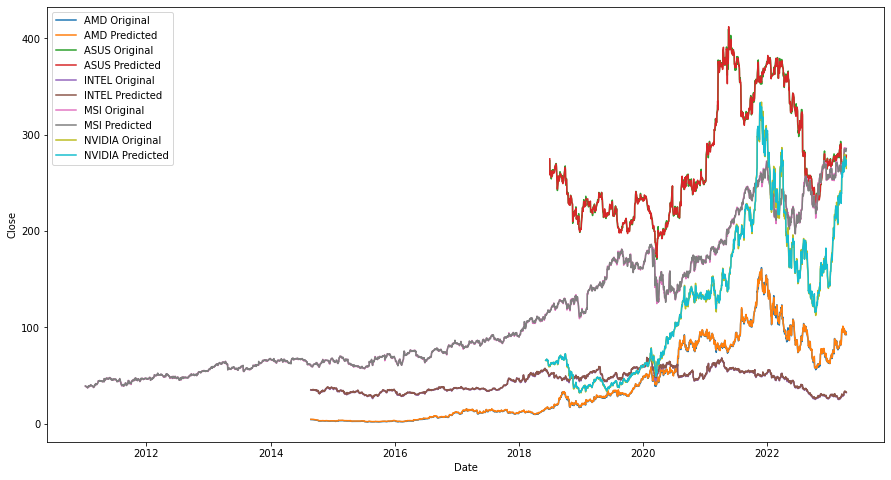

In [48]:

# Plot predictions and actual values
plt.figure(figsize=(15,8))


sns.lineplot(amd_dates,amd_orig)
sns.lineplot(amd_dates,amd_pred)

sns.lineplot(asus_dates,asus_orig)
sns.lineplot(asus_dates,asus_pred)

sns.lineplot(intel_dates,intel_orig)
sns.lineplot(intel_dates,intel_pred)

sns.lineplot(msi_dates,msi_orig)
sns.lineplot(msi_dates,msi_pred)

sns.lineplot(nvidia_dates,nvidia_orig)
sns.lineplot(nvidia_dates,nvidia_pred)

plt.legend(['AMD Original','AMD Predicted','ASUS Original','ASUS Predicted','INTEL Original',
            'INTEL Predicted','MSI Original','MSI Predicted','NVIDIA Original','NVIDIA Predicted'])
plt.show()

In [49]:
test_data

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
8687,2014-08-26,4.170000,4.220000,4.130000,4.190000,4.190000,9183900.0,0,2014,8,26
8688,2014-08-27,4.200000,4.210000,4.150000,4.160000,4.160000,7304400.0,0,2014,8,27
8689,2014-08-28,4.140000,4.190000,4.070000,4.140000,4.140000,10331400.0,0,2014,8,28
8690,2014-08-29,4.150000,4.190000,4.140000,4.170000,4.170000,7347200.0,0,2014,8,29
8691,2014-09-02,4.160000,4.250000,4.150000,4.160000,4.160000,12603300.0,0,2014,9,2
...,...,...,...,...,...,...,...,...,...,...,...
6089,2023-04-05,268.290009,269.980011,263.950012,268.809998,268.809998,51501500.0,4,2023,4,5
6090,2023-04-06,265.839996,270.799988,264.269989,270.369995,270.369995,39765400.0,4,2023,4,6
6091,2023-04-10,268.230011,276.209991,266.690002,275.790009,275.790009,39527900.0,4,2023,4,10
6092,2023-04-11,277.239990,277.899994,271.260010,271.690002,271.690002,31437800.0,4,2023,4,11


In [55]:
x_test.values[10].reshape(1,-1)

array([[4.08000e+00, 4.11000e+00, 4.01000e+00, 1.32768e+07, 2.01400e+03,
        9.00000e+00, 1.00000e+01, 0.00000e+00]])

In [56]:
x_test.columns

Index(['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Company'], dtype='object')

In [51]:
actual = test_data.iloc[10,4]
print('prediction:',lr.predict(x_test.values[10].reshape(1,-1)))
print('actual value:',actual)

prediction: [4.33007714]
actual value: 4.08


# Saving Model

In [52]:
import pickle as pkl

In [53]:
pkl.dump(lr,open('lr.pkl','wb'))

# Flask